# Linear Regression with Python Scikit Learn

In [1]:
#importing libraries to perfroms statistical and numerical functions
import pandas as pd
import numpy as np
#library for visualisation
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2a61ee442c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a61f260fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a61f253cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a61f270a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a61f270b48>],
 'means': []}

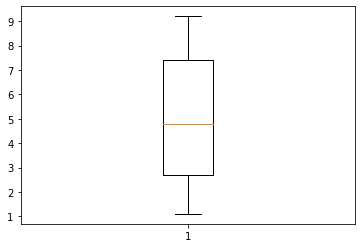

In [4]:
#Checking for outliers
plt.boxplot(data.Hours)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a61f319488>,
 'caps': [<matplotlib.lines.Line2D at 0x2a61f319f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a61f313dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a61f31ef08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a61f323cc8>],
 'means': []}

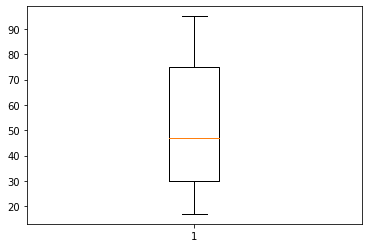

In [5]:
plt.boxplot(data.Scores)

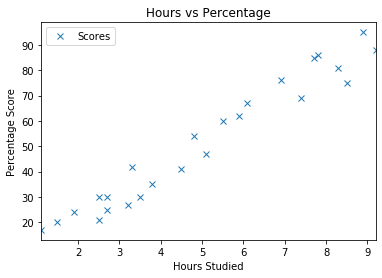

In [6]:
# Plotting the scatter plot to observe the depedency
data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
x = data.iloc[:,:-1].values

In [9]:
y = data.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

# Training the regression model

In [11]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

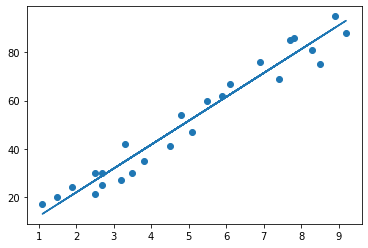

In [12]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [13]:
predict = model.predict(x_test)

In [14]:
predicted_data = pd.DataFrame({'Actual': y_test, 'Predicted': predict})  
predicted_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predict)) 

Mean Absolute Error: 4.183859899002975


In [16]:
# Predicting score for 9.25 hour
hour = [[9.25]]
predicted_value = model.predict(hour)
print("Predicted Score = {}".format(predicted_value[0]))

Predicted Score = 93.69173248737538
